# Intern Challenge
**Malcolm Nichols**  
May 5, 2022

### Load in Data

In [1]:
#Import Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_excel("2019 Winter Data Science Intern Challenge Data Set.xlsx")
#Show first 5 rows
raw_data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1.0,53.0,746.0,224.0,2.0,cash,2017-03-13 12:36:56.190
1,2.0,92.0,925.0,90.0,1.0,cash,2017-03-03 17:38:51.999
2,3.0,44.0,861.0,144.0,1.0,cash,2017-03-14 04:23:55.595
3,4.0,18.0,935.0,156.0,1.0,credit_card,2017-03-26 12:43:36.649
4,5.0,18.0,883.0,156.0,1.0,credit_card,2017-03-01 04:35:10.773


In [3]:
#Explore statistics of the varables
raw_data.describe(include='all')

C:\Users\Malcolm\AppData\Local\Temp/ipykernel_3284/3022457395.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  raw_data.describe(include='all')


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000,5000
unique,NaN,NaN,NaN,NaN,NaN,3,4995
top,NaN,NaN,NaN,NaN,NaN,credit_card,2017-03-28 04:00:00
freq,NaN,NaN,NaN,NaN,NaN,1735,3
first,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-01 00:08:09.179000
last,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-30 23:55:35.408000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,NaN,NaN
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,NaN,NaN
min,1.000000,1.000000,607.000000,90.000000,1.00000,NaN,NaN
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,NaN,NaN


In [4]:
#Looking at count we can tell there are no missing values, we want to pay attention
#to order_amount because that is what is being asked.
raw_data.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

We can see a large difference between the min and max for the feature. I believe the issue lies with some outliers in the data. We can clearly see the mx of 704000 appears to be manipulating the data in a way we do not want it to.  
Im thinking I will be fine by removing 0.5% or 1% of the problem samples (since they do not represent the overall average order value. We can see this above with the percentiles.

C:\Users\Malcolm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='order_amount', ylabel='Density'>

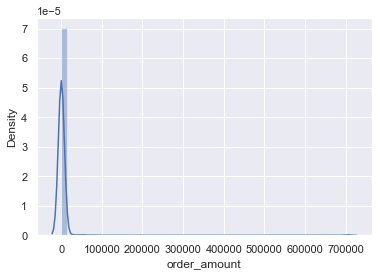

In [5]:
sns.distplot(raw_data['order_amount'])

The figure above is a visualization of the outlier.

In [6]:
#I am going to create a varable representing the 99th percentile of the variable
#and then creating a new dataframe with the condition of the order_amount being lower than the
#99th percentile.
t = raw_data.order_amount.quantile(0.99)
data = raw_data[raw_data.order_amount < t]
data.describe(include='all')

C:\Users\Malcolm\AppData\Local\Temp/ipykernel_3284/2331520816.py:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937,4937
unique,NaN,NaN,NaN,NaN,NaN,3,4937
top,NaN,NaN,NaN,NaN,NaN,credit_card,2017-03-13 12:36:56.190000
freq,NaN,NaN,NaN,NaN,NaN,1708,1
first,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-01 00:08:09.179000
last,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-30 23:55:35.408000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734,NaN,NaN
std,1444.069407,29.061131,86.840313,160.804912,0.982821,NaN,NaN
min,1.000000,1.000000,700.000000,90.000000,1.000000,NaN,NaN
25%,1248.000000,24.000000,775.000000,163.000000,1.000000,NaN,NaN


Here we lost about 63 data points which is a little over 1% but not detrimental to the overall data. We can take the average from this for a more accurage representation of the AOV.

In [7]:
data.order_amount.describe()

count    4937.000000
mean      302.580514
std       160.804912
min        90.000000
25%       163.000000
50%       284.000000
75%       387.000000
max      1760.000000
Name: order_amount, dtype: float64

AOV of $302.58